**Importing** **Data**

In [ ]:
from google.colab import drive
drive.mount('/content/drive') #this works to conect the drive to the script itself being then able to acess files such as the data.zip

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!unzip /content/drive/MyDrive/DACO_2021_2022/data.zip

Crema = "/content/Crema"
Ravdess = "/content/Ravdess"
Savee = "/content/Savee"
Tess = "/content/Tess"

#after this we can acess Crema, Ravdess, Savee and Tess datasets directly 


**Pre-processing and organizing data**

In [ ]:
#to deal with data we will use pandas, numpy and librosa, which is a very famou lib for audio 
import os
import re
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from IPython.display import Audio
import itertools

**TESS Dataset**

There are a set of 200 target words were spoken in the carrier phrase "Say the word _' by two actresses (aged 26 and 64 years) and recordings were made of the set portraying each of seven emotions (anger, disgust, fear, happiness, pleasant surprise, sadness, and neutral). There are 2800 data points (audio files) in total.

The dataset is organised such that each of the two female actor and their emotions are contain within its own folder. And within that, all 200 target words audio file can be found. The format of the audio file is a WAV format

https://tspace.library.utoronto.ca/handle/1807/24487

In [ ]:
Tess_list = os.listdir(Tess) 
tess_df = []

for i in Tess_list:
  if (i[4:len(i)]).lower() == "fear":  #the 4: len(i) is so that i can get the emotion string
    for j in os.listdir(os.path.join(Tess,i)):
      s = os.path.join(Tess,i, j)
      tess_df.append(("fear", s))

  elif (i[4:len(i)]).lower() == "happy":
    for j in os.listdir(os.path.join(Tess,i)):
      s = os.path.join(Tess,i, j)
      tess_df.append(("happy", s))

  elif (i[4:len(i)]).lower() == "angry":  
    for j in os.listdir(os.path.join(Tess,i)):
      s = os.path.join(Tess,i, j)
      tess_df.append(("angry", s))

  elif (i[4:len(i)]).lower() == "disgust":  
    for j in os.listdir(os.path.join(Tess,i)):
      s = os.path.join(Tess,i, j)
      tess_df.append(("disgust", s))

  elif (i[4:len(i)]).lower() == "sad":  
    for j in os.listdir(os.path.join(Tess,i)):
      s = os.path.join(Tess,i, j)
      tess_df.append(("sad", s ))

  elif (i[4:len(i)]).lower() == "neutral":  
    for j in os.listdir(os.path.join(Tess,i)):
      s = os.path.join(Tess,i, j)
      tess_df.append(("neutral", s ))
      
  elif (i[4:len(i)]).lower() == "pleasant_surprise":  
    for j in os.listdir(os.path.join(Tess,i)):
      s = os.path.join(Tess,i, j)
      tess_df.append(("surprised", s ))
      
  elif (i[4:len(i)]).lower() == "pleasant_surprised":  
    for j in os.listdir(os.path.join(Tess,i)):
      s = os.path.join(Tess,i, j)
      tess_df.append(("surprised", s ))



    
tessDf = pd.DataFrame.from_dict(tess_df)
tessDf.rename(columns={1 : "Path", 0 : "Emotion"}, inplace=True)

#adding a colum for the gender, in this case all female as described above - female will be 1, male 0
tessDf['Gender']=1 

#can use any emotion here and the audio paths are working as expected
emotion='neutral'
path = np.array(tessDf.Path[tessDf.Emotion == emotion])[9] #checking if the audios and the paths are working
print(path)
Audio(path)



/content/Tess/YAF_neutral/YAF_tough_neutral.wav


**Crema Dataset**

CREMA-D is a data set of 7,442 original clips from 91 actors. These clips were from 48 male and 43 female actors between the ages of 20 and 74 coming from a variety of races and ethnicities (African America, Asian, Caucasian, Hispanic, and Unspecified). Actors spoke from a selection of 12 sentences. The sentences were presented using one of six different emotions (Anger, Disgust, Fear, Happy, Neutral, and Sad) and four different emotion levels (Low, Medium, High, and Unspecified).

https://github.com/CheyneyComputerScience/CREMA-D

https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4313618/

The third component is responsible for the emotion label. The odds are female and the even are male

SAD - sadness; 
ANG - angry;
DIS - disgust;
FEA - fear;
HAP - happy;
NEU - neutral.

In [ ]:
Crema_list = os.listdir(Crema) 
crema_df = []
female = [1002,1003,1004,1006,1007,1008,1009,1010,1012,1013,1018,1020,1021,1024,1025,1028,1029,1030,1037,1043,1046,1047,1049,
          1052,1053,1054,1055,1056,1058,1060,1061,1063,1072,1073,1074,1075,1076,1078,1079,1082,1084,1089,1091]

for i in Crema_list:

  if i[9:12] == "FEA":  #the [9:12] is so that i can get the emotion string
    
    if (int(i[0:4]) in female): # famale 1, male 0
      s = os.path.join(Crema ,i)
      crema_df.append(("fear", s, 1))
    else:
      s = os.path.join(Crema ,i)
      crema_df.append(("fear", s, 0))

  elif i[9:12] == "HAP":

    if (int(i[0:4]) in female): 
      s = os.path.join(Crema ,i)
      crema_df.append(("happy", s, 1))
    else:
      s = os.path.join(Crema ,i)
      crema_df.append(("happy", s, 0))


  elif i[9:12] == "ANG":

    if (int(i[0:4]) in female): 
      s = os.path.join(Crema ,i)
      crema_df.append(("angry", s, 1))
    else:
      s = os.path.join(Crema ,i)
      crema_df.append(("angry", s, 0))

  elif i[9:12] == "DIS":

    if (int(i[0:4]) in female):
      s = os.path.join(Crema ,i)
      crema_df.append(("disgust", s, 1))
    else:
      s = os.path.join(Crema ,i)
      crema_df.append(("disgust", s, 0))

  elif i[9:12] == "SAD":
      
    if (int(i[0:4]) in female): 
      s = os.path.join(Crema ,i)
      crema_df.append(("sad", s, 1))
    else:
      s = os.path.join(Crema ,i)
      crema_df.append(("sad", s, 0))

  elif i[9:12] == "NEU":

    if (int(i[0:4]) in female): 
      s = os.path.join(Crema ,i)
      crema_df.append(("neutral", s, 1))
    else:
      s = os.path.join(Crema ,i)
      crema_df.append(("neutral", s, 0))

    
cremaDf = pd.DataFrame.from_dict(crema_df)
cremaDf.rename(columns={1 : "Path", 0 : "Emotion", 2 : "Gender"}, inplace=True)
cremaDf.head(-10)

male = np.array(cremaDf.Path[cremaDf.Gender == 0])
female = np.array(cremaDf.Path[cremaDf.Gender == 1])

#can use any emotion here and the audio paths are working as expected
emotion='neutral'
path = np.array(cremaDf.Path[cremaDf.Emotion == emotion][cremaDf.Gender == 0])[5] #checking if the audios and the paths are working
print(path)
Audio(path)

/content/Crema/1083_DFA_NEU_XX.wav


**Ravdess Dataset**

This portion of the RAVDESS contains 1440 files: 60 trials per actor x 24 actors = 1440. The RAVDESS contains 24 professional actors (12 female, 12 male), vocalizing two lexically-matched statements in a neutral North American accent. Speech emotions includes calm, happy, sad, angry, fearful, surprise, and disgust expressions. Each expression is produced at two levels of emotional intensity (normal, strong), with an additional neutral expression.

File naming convention

Each of the 1440 files has a unique filename. The filename consists of a 7-part numerical identifier (e.g., 03-01-06-01-02-01-12.wav). These identifiers define the stimulus characteristics:

Filename identifiers
Emotion (01 = neutral, 02 = calm, 03 = happy, 04 = sad, 05 = angry, 06 = fearful, 07 = disgust, 08 = surprised).

Filename example: 03-01-06-01-02-01-12.wav

Audio-only (03)
Speech (01)
Fearful (06)
Normal intensity (01)
Statement "dogs" (02)
1st Repetition (01)
12th Actor (12)
Actor (01 to 24. Odd numbered actors are male, even numbered actors are female).


https://www.kaggle.com/uwrfkaggler/ravdess-emotional-speech-audio

In [ ]:
Ravdess_list = os.listdir(os.path.join(Ravdess,"/content/Ravdess/audio_speech_actors_01-24")) 
rav_str = (os.path.join(Ravdess,"/content/Ravdess/audio_speech_actors_01-24"))
Ravdess_df = []
emotion_dic = {1: "neutral", 2:"calm", 3: "happy", 4: "sad", 5: "angry", 6: "fear", 7: "disgust", 8: "surprised"}

for i in Ravdess_list: #for actor in Ravdess_listt
    #print(i[-2:len(i)])
    if int(i[-2:len(i)]) % 2 == 0: #checking the actor digits to see if male or female
      gender = 1 #female is 1
    else:
      gender = 0 #male is 0

    waves = os.listdir(os.path.join(rav_str,i))
    for j in waves:
      info = j.partition(".wav")[0].split("-")
      emotion =  emotion_dic.get(int(info[2]))
      Ravdess_df.append((emotion, os.path.join(os.path.join(rav_str,i), j), gender))

    
RavdessDf = pd.DataFrame.from_dict(Ravdess_df)
RavdessDf.rename(columns={1 : "Path", 0 : "Emotion", 2 : "Gender"}, inplace=True)


male = np.array(RavdessDf.Path[RavdessDf.Gender == 0])
female = np.array(RavdessDf.Path[RavdessDf.Gender == 1])

#can use any emotion here and the audio paths are working as expected
emotion='disgust'
path = np.array(RavdessDf.Path[RavdessDf.Emotion == emotion][RavdessDf.Gender == 0])[5] #checking if the audios and the paths are working
print(path)
Audio(path)

/content/Ravdess/audio_speech_actors_01-24/Actor_13/03-01-07-01-02-02-13.wav


**SAVEE**

The SAVEE database was recorded from four native English male speakers identified as DC, JE, JK, KL), postgraduate students and researchers at the University of Surrey aged from 27 to 31 years. Emotion has been described psychologically in discrete categories: anger, disgust, fear, happiness, sadness and surprise. This is supported by the cross-cultural studies of Ekman [6] and studies of automatic emotion recognition tended to focus on recognizing these [12]. We added neutral to provide recordings of 7 emotion categories. The text material consisted of 15 TIMIT sentences per emotion: 3 common, 2 emotion-specific and 10 generic sentences that were different for each emotion and phonetically-balanced. The 3 common and 2 × 6 = 12 emotion-specific sentences were recorded as neutral to give 30 neutral sentences.

The initial letter(s) of the file name represents the emotion class, and the following digits represent the sentence number.
The letters 'a', 'd', 'f', 'h', 'n', 'sa' and 'su' represent 'anger', 'disgust', 'fear', 'happiness', 'neutral', 'sadness' and 'surprise' emotion classes respectively. 

https://www.kaggle.com/barelydedicated/savee-database

In [ ]:
Savee_list = os.listdir(Savee) 
Savee_df = []
emotion_dic = {"n": "neutral", "h": "happy", "sa": "sad", "a": "angry", "f": "fear", "d": "disgust", "su": "surprised"}

for i in Savee_list:

  if len(i) == 10: 
    emo  = i[3:4]
  elif len(i) ==11:
    emo = i[3:5]

  emotion =  emotion_dic.get(emo)
  Savee_df.append((emotion, os.path.join(Savee, i)))


SaveeDf = pd.DataFrame.from_dict(Savee_df)
SaveeDf.rename(columns={1 : "Path", 0 : "Emotion"}, inplace=True)

#all male so adding the gender collmun now
SaveeDf['Gender']=1

#can use any emotion here and the audio paths are working as expected
emotion='neutral'
path = np.array(SaveeDf.Path[SaveeDf.Emotion == emotion][SaveeDf.Gender == 1])[7] #checking if the audios and the paths are working
print(SaveeDf.head(-5))
Audio(path)


**Data exploration**

In [ ]:
# creating Dataframe using all the 4 dataframes we created so far.

data = pd.concat([RavdessDf, cremaDf, tessDf, SaveeDf], axis = 0)

data.to_csv("data_path.csv",index=False)

data.head(-5)

,Emotion,Path,Gender
0,sad,/content/Ravdess/audio_speech_actors_01-24/Act...,1
1,happy,/content/Ravdess/audio_speech_actors_01-24/Act...,1
2,happy,/content/Ravdess/audio_speech_actors_01-24/Act...,1
3,disgust,/content/Ravdess/audio_speech_actors_01-24/Act...,1
4,calm,/content/Ravdess/audio_speech_actors_01-24/Act...,1
...,...,...,...
470,surprised,/content/Savee/JE_su01.wav,1
471,angry,/content/Savee/DC_a13.wav,1
472,surprised,/content/Savee/DC_su02.wav,1
473,happy,/content/Savee/KL_h01.wav,1


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


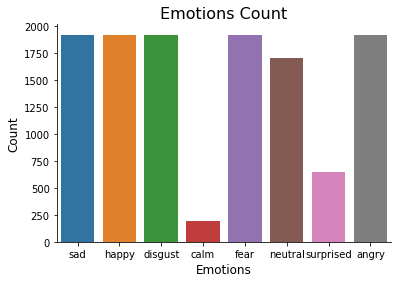

In [ ]:
plt.title('Emotions Count', size=16)
sns.countplot(data.Emotion)
plt.ylabel('Count', size=12)
plt.xlabel('Emotions', size=12)
sns.despine(top=True, right=True, left=False, bottom=False)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


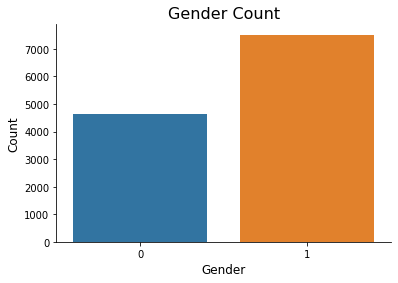

In [ ]:
plt.title('Gender Count', size=16)
sns.countplot(data.Gender)
plt.ylabel('Count', size=12)
plt.xlabel('Gender', size=12)
sns.despine(top=True, right=True, left=False, bottom=False)
plt.show()

In [ ]:
print(RavdessDf.shape[0], " Should have ", 1440)
print(tessDf.shape[0], " Should have ", 2800)
print(cremaDf.shape[0], " Should have ", 7442)
print(SaveeDf.shape[0], " Should have ", 4*120)

1440  Should have  1440
2800  Should have  2800
7442  Should have  7442
480  Should have  480


In [ ]:
#Data augmentation
def noise(data):
    noise_amp = 0.035*np.random.uniform()*np.amax(data)
    data = data + noise_amp*np.random.normal(size=data.shape[0])
    return data

def stretch(data, rate=0.8):
    return librosa.effects.time_stretch(data, rate)

def pitch(data, sampling_rate, pitch_factor=0.7):
    return librosa.effects.pitch_shift(data, sampling_rate, pitch_factor)



In [ ]:
def extractFeatures(data, sample_rate):

    #Mel-frequency Cepstral Coefficients (MFCCs)  - v2
    #Mel-scaled spectrogram
    #Chromagram
    #Spectral contrast feature
    #Tonnetz representation
    
    result = np.array([])
    stft = np.abs(librosa.stft(data))

    #Tonnetz representation
    tonnetz = np.mean(librosa.feature.tonnetz(y=data, sr=sample_rate).T, axis=0)
    result = np.hstack((result, tonnetz)) # stacking horizontally

    #Spectral contrast feature
    speconstrast = np.mean(librosa.feature.spectral_contrast(y=data, sr=sample_rate).T, axis=0)
    result = np.hstack((result, speconstrast)) # stacking horizontally

    ##Chromagram
    r_stft = []
    chroma_stft = np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T, axis=0)
    #chroma_stft = librosa.feature.chroma_stft(S=stft, sr=sample_rate)
    result = np.hstack((result, chroma_stft)) # stacking horizontally
    r_stft.append(chroma_stft)

    # MelSpectogram
    r_mel = []
    mel = np.mean(librosa.feature.melspectrogram(S = stft, sr=sample_rate).T, axis=0)
    #mel = librosa.feature.melspectrogram(y=data, sr=sample_rate)
    result = np.hstack((result, mel)) # stacking horizontally
    r_mel.append(mel)
 
    
    # MFCC
    r_mfcc = []
    mfcc = np.mean(librosa.feature.mfcc(y=data, sr=sample_rate).T, axis=0)
    #mfcc = librosa.feature.mfcc(y=data, sr=sample_rate)
    result = np.hstack((result, mfcc)) # stacking horizontally
    r_mfcc.append(mfcc)

    return result
   


def getFeatures(path):
    # duration and offset are used to take care of the no audio in start and the ending of each audio files as seen above.
    #as most of the audios have between 2 and 4 sec and the first milisec are "trash" 
    #we have set the duration to 2.5 and offset to 0.5, meaning it will start after 0.5 and read 2.5 sec of the audio. If it is longer, then it will read "0s"
    #this step is crucial otherwise our data sample would have had different sizes and therefore we couldnt train the model 
   
    aud, sample_rate = librosa.load(path, duration=2.5, offset=0.5) 
    
    #Augmentation # uncomment to do data augmentation
    #audnoise= noise(aud)
    #audstretch=stretch(aud,rate=0.8)
    #audpitch=pitch(aud,sample_rate,pitch_factor=0.7)

   
    features = extractFeatures(aud, sample_rate)
    
    #features_noise = extractFeatures(audnoise, sample_rate)
    #features_stretch = extractFeatures(audstretch, sample_rate)
    #features_pitch = extractFeatures(audpitch, sample_rate)
    
    return features
    #return features,features_noise,features_stretch,features_pitch  # uncomment to do data augmentation


In [ ]:
print("Data shape", data.shape)
print("Sample rate", Fs)

print("CHROMA SFTF ",chroma_stft.shape)
print("MelSpectogram", mel.shape)
print("Mel frequency cepstral coefficientes", mfcc.shape)
print("Tonnetz ", tonnetz.shape)
print("Spectral contrast feature ", speconstrast.shape)


In [ ]:
X, Y = [], []

for path, emotion in zip(data.Path, data.Emotion):
    
    ##uncomment to do data augmentation

    #feature,feature_noise,feature_stretch,feature_pitch  = getFeatures(path)
    feature = getFeatures(path)
    X.append(feature)
    
    #X.append(feature_noise)
    #X.append(feature_stretch)
    #X.append(feature_pitch)
    ## appending emotion 3 times as we have made 3 augmentation techniques on each audio file.
    Y.append(emotion)
    #Y.append(emotion)
    #Y.append(emotion)
    #Y.append(emotion)


Features = pd.DataFrame(X)
Features['labels'] = Y
Features.to_csv('features.csv', index=False)
from google.colab import files
files.download('features.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Mel-spect image extraction 
import matplotlib
matplotlib.use('Agg') # No pictures displayed 
import pylab
import librosa
import librosa.display
import numpy as np


def get_images_melSpectogram(path,emotion,i):
  aud, sample_rate = librosa.load(path, duration=2.5, offset=0.5) 
  # MelSpectogram
  emotion_ = emotion + '/' 
  image_name="img_"+ str(i) +"_"+emotion+".png"
  S = librosa.feature.melspectrogram(y=aud, sr=sample_rate)
  librosa.display.specshow(librosa.power_to_db(S, ref=np.max))  
  my_path="/content/drive/MyDrive/DACO_2021_2022/"
  plt.savefig(os.path.join(my_path, image_name),bbox_inches='tight',pad_inches = 0) 
  plt.close()

In [ ]:
#Loop for image extraction
i=0
for path,emotion in zip(data.Path,data.Emotion):
 get_images_melSpectogram(path,emotion,i)
 i=i+1


